In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("vehicles_us.csv")

# Initial data overview
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(   price  model_year           model  condition  cylinders fuel  odometer  \
 0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
 1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
 2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
 3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
 4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
 
   transmission    type paint_color  is_4wd date_posted  days_listed  
 0    automatic     SUV         NaN     1.0  2018-06-23           19  
 1    automatic  pickup       white     1.0  2018-10-19           50  
 2    automatic   sedan         red     NaN  2019-02-07           79  
 3    automatic  pickup         NaN     NaN  2019-03-22            9  
 4    automatic   sedan       black     NaN  2019-04-02           28  ,
 None,
                price    model_year     cylinders       odometer   is_4wd  \
 count   51525.0000

In [2]:
# Fill missing model_year values with median by model
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

# Fill missing cylinders values with median by model
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

# Fill missing odometer values with median by model_year
df['odometer'] = df.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

In [3]:
# Remove outliers in model_year
df = df[(df['model_year'] >= 1950) & (df['model_year'] <= 2025)]

# Remove extreme price values
df = df[(df["price"] > 1000) & (df["price"] < 100000)]

In [4]:
# Save cleaned dataset
df.to_csv("vehicles_us_cleaned.csv", index=False)

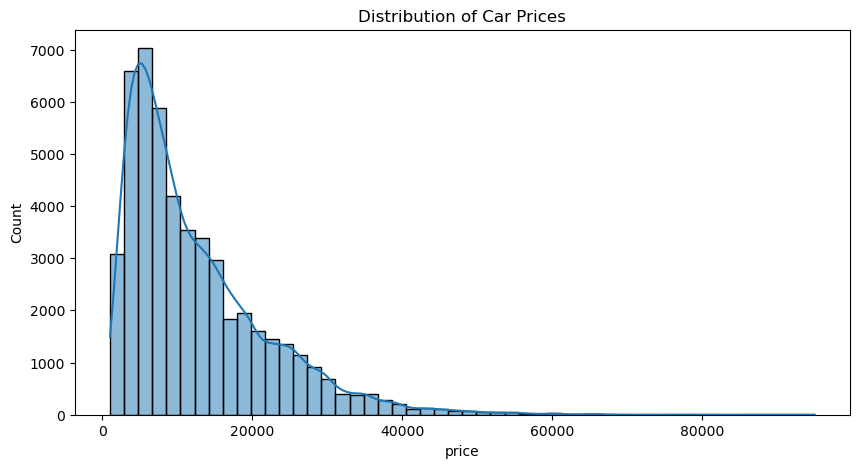

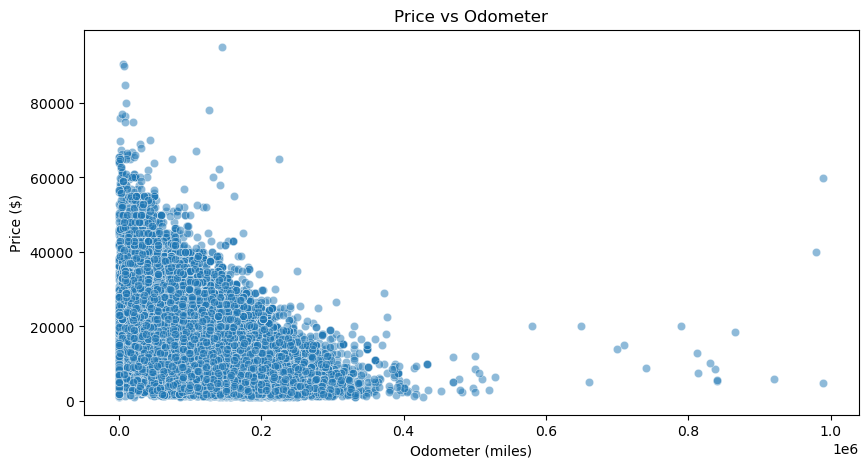

In [5]:
# Histogram of car prices
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

# Scatter plot: Price vs Odometer
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["odometer"], y=df["price"], alpha=0.5)
plt.title("Price vs Odometer")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.show()